In [ ]:
data_process = "data/processed"
data_final = "data/final/predictions.pkl"

In [ ]:
import joblib 
import pandas as pd 
from sklearn.metrics import confusion_matrix
import joblib

y_pred = joblib.load(data_process)['y_test']
predictions = joblib.load(data_final)
confusion_matrix(y_pred, predictions)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('../data/raw/telco_customer_churn.csv')

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

<AxesSubplot:xlabel='Churn Value', ylabel='count'>

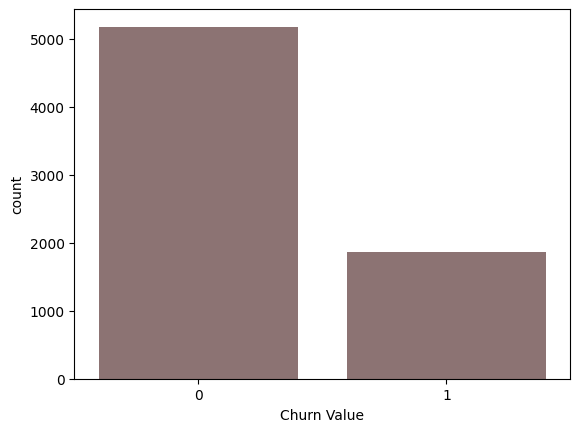

In [8]:
sns.countplot(x='Churn Value',data=df, color='red', saturation=0.1)

In [9]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

#### Check and drop columns that may not be useful

In [240]:
# Churn Label, Churn Score, CLTV and Churn Reason are data from churn interview hence they can not be used to predict churn
# because they were collected with prior knowledge of the target value

In [10]:
# Count has only one unique value and won't be useful for prediction
df['Count'].nunique()

1

In [11]:
# Country has only one unique value and won't be useful for prediction
df['Country'].nunique()

1

In [12]:
# State has only one unique value and won't be useful for prediction
df['State'].nunique()

1

In [13]:
# Every customer (column) has unique value for CustomerID hence CustomerID column won't be useful for preduction
df['CustomerID'].nunique()

7043

In [14]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


#### lat Long has been broken into seperate columns called Latitude and Longitude hence there won't be need to retain Lat Long

In [15]:
df.drop(['Churn Label','Churn Score', 'CLTV', 'Churn Reason',
        'Count', 'Country', 'State', 'CustomerID', 'Lat Long'], axis = 1, inplace = True)

In [16]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

The whitespace in the values of City will lead to errors when drwing decision tree. Also, whitespeces in columns names will bring up issues during model serving hence I will remove whitespaces from City values and column names

In [18]:
#replace whitespaces in City values with _
df['City'].replace(' ', '_', regex=True, inplace=True)

In [19]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [250]:
#remove whitespaces from columns
df.columns = df.columns.str.replace(' ', '_')

In [251]:
df.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')

In [252]:
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [253]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

I cheched all the columns values to be sure that columns have appropriate datatypes and found an issue with only the Total_Charges column whose data type is object but the column contain bunch of values. This typically happen when there are few non numeric values within the column. I shall explore the column more.

In [254]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

Trying to convert the Total_Charges to numeric column usins df['Total_Charges'] = pd.to_numeric(df['Total_Charges']) 
thre a value error saying "Unable to parse string at position 2234", hence I checked the value at row 2234

In [255]:
df['Total_Charges'].iloc[2233:2236]

2233    6201.95
2234           
2235    6597.25
Name: Total_Charges, dtype: object

We have noticed that there is an empty space in row 2234. I will try to find out the number of other rows with such whitespaces

In [256]:
#there are 11 missing vlaues (empty spaces) in the Total_Charges column
len(df.loc[df['Total_Charges']==" "]['Total_Charges'])

11

In [257]:
# I will visualize the empty values in the Total_Charges column. Observe the Total_Charges column
df.loc[df['Total_Charges']==" "]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


Probably, the customers (rows) involved are newly subscribed customers who have not been charged. Also, observe that their Churn_Value are all zero meaning that the 11 customers had not left. I shall resolve this by setting the emptytotal_Charges to zero

In [258]:
df.loc[(df['Total_Charges']==" "),'Total_Charges']= 0

In [259]:
#no more empty spaces
df.loc[df['Total_Charges']==" "]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value


In [260]:
#empty spaces now replaced with zeros
df.loc[df['Total_Charges']==0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


Now, I will convert the datatype of Total_Charges column to float

In [261]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

In [262]:
df['Total_Charges'].dtypes

dtype('float64')

Having confirmed that there are no more empty spaces/missing values in the numeric columns, I will now replace all whitespeces in the entire dataframe with underscore(_)

In [263]:
df.replace(' ', '_', regex=True, inplace=True)

In [264]:
#observe the effect on the payment column
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [265]:
# The target column has  unique values of 0 and 1 asas expected
df['Churn_Value'].unique()

array([1, 0], dtype=int64)

## DATA PREP

In [266]:
X = df.drop('Churn_Value',axis=1)
y = df['Churn_Value']

In [267]:
#oberser oject, integer and float datatype
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

I shall convert the categorical variables to dummy variables because XGBoost algorithms, just like most ML tools do not support categorical variables.

In [268]:
X_encoded = pd.get_dummies(X, columns = ['City',
                                         'Gender',
                                         'Senior_Citizen',
                                         'Partner',
                                         'Dependents',
                                         'Phone_Service',
                                         'Multiple_Lines',
                                         'Internet_Service',
                                         'Online_Security',
                                         'Online_Backup',
                                         'Device_Protection',
                                         'Tech_Support',
                                         'Streaming_TV',
                                         'Streaming_Movies',
                                         'Contract',
                                         'Paperless_Billing',
                                         'Payment_Method'
                                         
    
])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


#only 26.5% of the records have Churn_Value of 1 hence the dataset is inbalanced. Cosequently, I will use stratified splitting to retain the same percentatge in both training and test set

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [270]:
sum(y_train)/len(y_train)

0.2654297614539947

In [181]:
sum(y_test)/len(y_test)

0.26519023282226006

Observe that both train and test dataset have same percentage of Churn_Value of 1

In [307]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, missing=0, seed=42)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64414
[2]	validation_0-aucpr:0.65129
[3]	validation_0-aucpr:0.65054
[4]	validation_0-aucpr:0.65323
[5]	validation_0-aucpr:0.64855
[6]	validation_0-aucpr:0.65460
[7]	validation_0-aucpr:0.65895
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65851
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66528
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66001
[15]	validation_0-aucpr:0.66028
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65590
[18]	validation_0-aucpr:0.65735
[19]	validation_0-aucpr:0.65857
[20]	validation_0-aucpr:0.65896
[21]	validation_0-aucpr:0.65961


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=0,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\HP 1O3O G2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


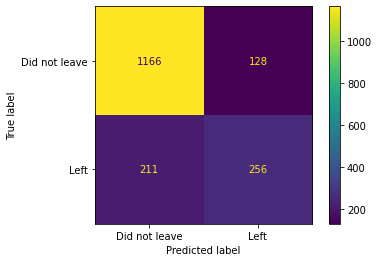

In [308]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Did not leave","Left"])

In [281]:
1166/(1166+128)

0.9010819165378671

In [282]:
256/(211+256)

0.5481798715203426

90% of the customers who stayed were correctly classified while only 55% of Churns were correctly predicted. This is not a good performance. Observe that the model was trained mostly with default parameters. I shall now carry out hyperparameter tunning using the GridSearchCV as well as panalizing wrong prediction of Churn using the scale_pos_weight parameter to see how much the performance will improve, especially in predicting the rare case which is of interest.

In [313]:
param_grid = {
    "max_depth":[3,4,5],
    "learning_rate":[0.1,0.01,0.05],
    "gamma":[0,0.25,1.0],
    "reg_lambda":[0,1.0,10.0],
}

I shall fix the "scale_pos_weight" at 3 (that is sum(stay)/sum(Leave) to penalize the model for misclassifying the rare class)

In [314]:
optima_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective="binary:logistic",
                                    use_label_encoder=False,
                                    seed=42,
                                    subsample=0.9,
                                    colsample_bytree=0.5),
    param_grid=param_grid,
    scoring="roc_auc",
    verbose=0,
    n_jobs=10,
    cv=3
)

In [315]:
optima_params.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_metric="auc",
                  eval_set=[(X_test,y_test)],
                  verbose=False
)
print(optima_params.best_params_)

C:\Users\HP 1O3O G2\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0}


I shall adjust the hyperparameters for the parameter that the extreme values were chosen to be optimal. This is because the optima parameter values may be outside the earlier chosen range.

In [316]:
para_grid = {
    "max_depth":[4],
    "learning_rate":[0.1,0.5,1],
    "gamma":[0.25],
    "reg_lambda":[10.0,20,100],
}

In [317]:
optima_params.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_metric="auc",
                  eval_set=[(X_test,y_test)],
                  verbose=False
)
print(optima_params.best_params_)

C:\Users\HP 1O3O G2\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0}


### I will now use the optimal parameters

In [318]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learning_rate=0.1,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5,
                           use_label_encoder=False,
                           missing=0)
                          
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.56673
[1]	validation_0-aucpr:0.59533
[2]	validation_0-aucpr:0.62518
[3]	validation_0-aucpr:0.62635
[4]	validation_0-aucpr:0.63193
[5]	validation_0-aucpr:0.63172
[6]	validation_0-aucpr:0.62948
[7]	validation_0-aucpr:0.63057
[8]	validation_0-aucpr:0.63609
[9]	validation_0-aucpr:0.63616
[10]	validation_0-aucpr:0.63627
[11]	validation_0-aucpr:0.65627
[12]	validation_0-aucpr:0.65366
[13]	validation_0-aucpr:0.65374
[14]	validation_0-aucpr:0.65625
[15]	validation_0-aucpr:0.64851
[16]	validation_0-aucpr:0.64590
[17]	validation_0-aucpr:0.64504
[18]	validation_0-aucpr:0.64514
[19]	validation_0-aucpr:0.65211
[20]	validation_0-aucpr:0.65100


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=0, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=10, scale_pos_weight=3,
              seed=42, subsample=0.9, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

C:\Users\HP 1O3O G2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


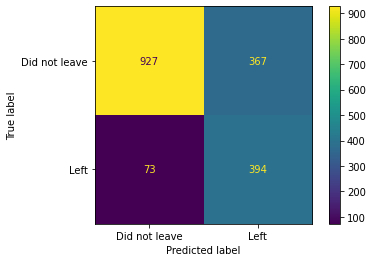

In [319]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Did not leave","Left"])

In [320]:
927/(915+367)

0.7230889235569423

In [321]:
394/(394+73)

0.8436830835117773

Now, 84% of customer churn are correctly predicted. This is at the expense of reduction in percentateg of correct prediction of the customers who did not leave from 90% to 72%. This is a far better result because interest is on retaining customers that are expected to churn. The implication is that extra resouces may be expended in trying to retain customers who are wrongly predicted be among those the will leave but this is a far better option as the extra resources may even encurage those customers to increase their patronage. 

In [323]:
clf_xgb=xgb.XGBClassifier(seed=42,
                        objective="binary:logistic",
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False,
                        missing=0,
                         n_estimators=1)
clf_xgb.fit(X_train,y_train)                         

[14:27:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=0, monotone_constraints='()',
              n_estimators=1, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=10, scale_pos_weight=3,
              seed=42, subsample=0.9, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [330]:
bst=clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s: ' %importance_type, bst.get_score(importance_type=importance_type))
    
node_params={'shape':'box',
            'style':'filled',
            'fillcolor':'#78cbe'}
leaf_params={'shape':'box',
            'style':'filled',
            'fillcolor':'#e48038'}

weight:  {'Latitude': 1.0, 'Tenure_Months': 5.0, 'Monthly_Charges': 2.0, 'Senior_Citizen_No': 1.0, 'Internet_Service_DSL': 2.0, 'Internet_Service_Fiber_optic': 1.0, 'Tech_Support_No': 1.0, 'Contract_One_year': 1.0, 'Contract_Two_year': 1.0}
gain:  {'Latitude': 6.79351806640625, 'Tenure_Months': 112.87569427490234, 'Monthly_Charges': 13.62578010559082, 'Senior_Citizen_No': 14.307220458984375, 'Internet_Service_DSL': 85.56890869140625, 'Internet_Service_Fiber_optic': 134.15879821777344, 'Tech_Support_No': 1133.810546875, 'Contract_One_year': 13.28778076171875, 'Contract_Two_year': 252.51153564453125}
cover:  {'Latitude': 219.75, 'Tenure_Months': 413.95001220703125, 'Monthly_Charges': 148.875, 'Senior_Citizen_No': 98.75, 'Internet_Service_DSL': 538.75, 'Internet_Service_Fiber_optic': 484.0, 'Tech_Support_No': 1820.25, 'Contract_One_year': 470.5, 'Contract_Two_year': 742.75}
total_gain:  {'Latitude': 6.79351806640625, 'Tenure_Months': 564.3784790039062, 'Monthly_Charges': 27.25156021118164

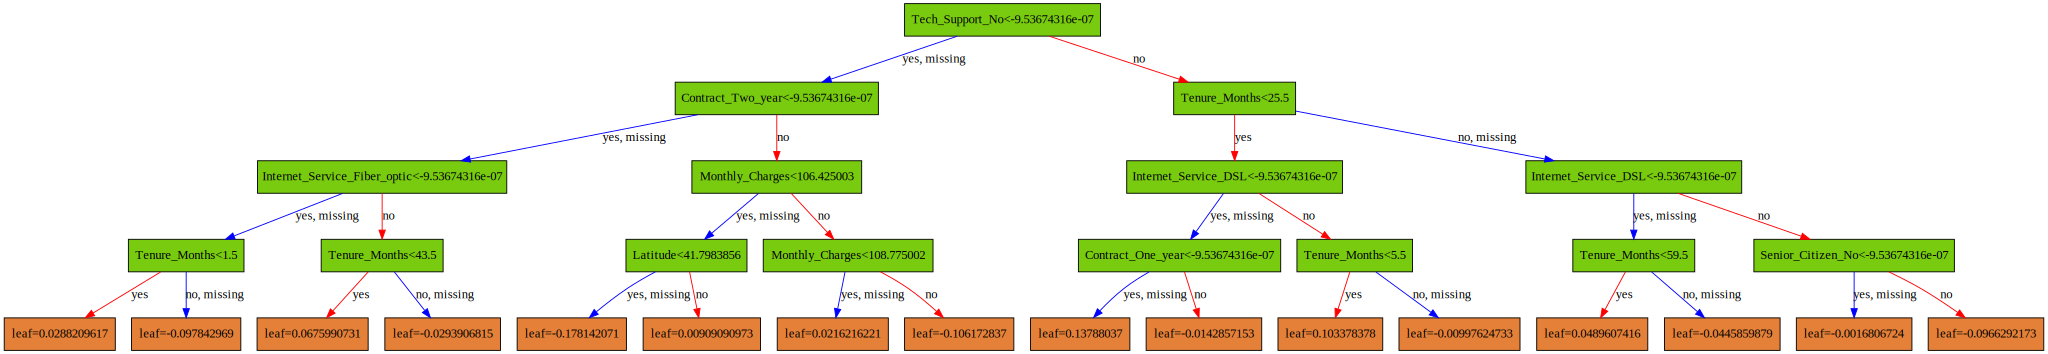

In [331]:
xgb.to_graphviz(clf_xgb,num_trees=0,size="10,10",
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

## EXPERIMENT WITH OTHER CLASSIFICATION ALGORITHM
To be sure that no other algorithmn perdorm significantly better on this dataset, I will use the lazypredict framework to loop through several classification algorithm and compare the result with that of XGBoostClassifier

In [334]:
from lazypredict.Supervised import LazyClassifier

In [335]:
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)

In [336]:
models,_predictions=clf.fit(X_train,X_test,y_train,y_test)

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [02:00<00:18,  6.18s/it]

[15:08:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:11<00:00,  4.54s/it]


In [337]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.74               0.76     0.76      0.75   
NearestCentroid                    0.72               0.75     0.75      0.73   
AdaBoostClassifier                 0.79               0.72     0.72      0.79   
LGBMClassifier                     0.79               0.71     0.71      0.79   
RandomForestClassifier             0.80               0.70     0.70      0.79   
XGBClassifier                      0.79               0.70     0.70      0.78   
ExtraTreesClassifier               0.79               0.70     0.70      0.79   
BaggingClassifier                  0.79               0.69     0.69      0.78   
LinearDiscriminantAnalysis         0.75               0.68     0.68      0.75   
RidgeClassifierCV                  0.75               0.67     0.67      0.75   
RidgeClassifier             

The XGBoost classifier is one of the 6 best performing algorithm. The difference in performance among the 6 algorithm is considered insignificant hence I will stick to the XGBoostClassifier.